Notes by - Kiran A Bendigeri
Please Read 'Read me' file.

1 Introduction
Machine learning was defined in 1959 by Arthur Samuel as the "field of study that gives computers the ability to learn without being explicitly programmed." This means imbuing knowledge to machines without hard-coding it.

2 Regression Introduction
pip install numpy
pip install scipy
pip install scikit-learn
pip install matplotlib
pip install pandas
pip install quandl

Regression is a form of supervised machine learning, which is where the scientist teaches the machine by showing it features and then showing it what the correct answer is, over and over, to teach the machine.
A popular use with regression is to predict stock prices.


In [145]:
import pandas as pd
import quandl

df = quandl.get("WIKI/GOOGL")
#First 5 Rows
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [146]:
#Last 5 Rows
print(df.tail()) 

               Open     High      Low    Close     Volume  Ex-Dividend  \
Date                                                                     
2018-03-12  1165.05  1178.16  1159.20  1165.93  2129297.0          0.0   
2018-03-13  1171.83  1178.00  1134.57  1139.91  2129435.0          0.0   
2018-03-14  1145.80  1159.76  1142.35  1148.89  2033697.0          0.0   
2018-03-15  1149.57  1162.50  1135.66  1150.61  1623868.0          0.0   
2018-03-16  1155.35  1156.81  1131.36  1134.42  2654602.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-03-12          1.0    1165.05    1178.16   1159.20     1165.93   
2018-03-13          1.0    1171.83    1178.00   1134.57     1139.91   
2018-03-14          1.0    1145.80    1159.76   1142.35     1148.89   
2018-03-15          1.0    1149.57    1162.50   1135.66     1150.61   
2018-03-16          1.0    1155.35    1156.81   1131.36

Adjusted columns are the most ideal ones. Regular columns here are prices on the day, but stocks have things called stock splits,where suddenly 1 share becomes something like 2 shares, thus the value of a share is halved, but the value of the company has not halved. Adjusted columns are adjusted for stock splits over time, which makes them more reliable for doing analysis.

In [147]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.072956    0.324968   44659000.0
2004-08-20   54.322689  7.921706    7.227007   22834300.0
2004-08-23   54.869377  4.049360   -1.227880   18256100.0
2004-08-24   52.597363  7.657099   -5.726357   15247300.0
2004-08-25   53.164113  3.886792    1.183658    9188600.0


3 Regression - Features and Labels
numpy module to convert data to numpy arrays.
preprocessing is the module used to do some cleaning/scaling of data prior to machine learning, and cross_validation is used in the testing stages. 
LinearRegression algorithm as well as svm from Scikit-learn, which will be used as our machine learning algorithms to demonstrate results.
With supervised learning, you have features and labels. The features are the descriptive attributes, and the label is what you're attempting to predict or forecast. 
The price that is the label shall be the price at some determined point the future.


In [148]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

We define the forecasting column, then we fill any NaN data with -99999. You have a few choice here regarding how to handle missing data. You can't just pass a NaN (Not a Number) datapoint to a machine learning classifier, you have to handle for it. One popular option is to replace missing data with -99,999. With many machine learning classifiers, this will just be recognized and treated as an outlier feature. You can also just drop all feature/label sets that contain missing data, but then you're maybe leaving a lot of data out.

In [149]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))

In [150]:
df['label'] = df[forecast_col].shift(-forecast_out)

Now we have the data that comprises our features and labels.The features are a bunch of the current values, and the label shall be the price.

4 Regression - Training and Testing
 drop any still NaN information from the dataframe:

In [151]:
df.dropna(inplace=True)

It is a typical standard with machine learning in code to define X (capital x), as the features, and y (lowercase y) as the label that corresponds to the features.

In [152]:
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

Generally, you want your features in machine learning to be in a range of -1 to 1. This may do nothing, but it usually speeds up processing and can also help with accuracy. Because this range is so popularly used, it is included in the preprocessing module of Scikit-Learn.

In [153]:
X = preprocessing.scale(X)

In [154]:
y = np.array(df['label'])

Now comes the training and testing. The way this works is you take, for example, 75% of your data, and use this to train the machine learning classifier. Then you take the remaining 25% of your data, and test the classifier. Since this is your sample data, you should have the features and known labels. Thus, if you test on the last 25% of your data, you can get a sort of accuracy and reliability, often called the confidence score. There are many ways to do this, but, probably the best way is using the build in cross_validation provided, since this also shuffles your data for you. 

In [155]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

There are many classifiers in general available through Scikit-Learn, and even a few specifically for regression. We'll show a couple in this example, but for now, let's use Support Vector Regression from Scikit-Learn's svm package.

In [156]:
clf = svm.SVR()

With Scikit-Learn (sklearn), you train with .fit

In [157]:
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Classifier is now trained Now we can test it.

In [158]:
confidence = clf.score(X_test, y_test)
print(confidence)

0.7820607095835086


There is a parameter to svm.SVR for example which is kernel.kernel like a transformation against your data. It's a way to simplify your data. This makes processing go much faster. In the case of svm.SVR, the default is rbf, which is a type of kernel.We have 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable. Again, just like the suggestion to try the various ML algorithms that can do what we want, try the kernels.

In [159]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.9765509063740746
poly 0.6508511506868436
rbf 0.7820607095835086
sigmoid 0.8896493390876191


5 Regression - Forecasting and Predicting
There are still many issues to consider, especially with different companies that have different price trajectories over time. Google really is very linear: Up and to the right. Many companies aren't, so keep this in mind. Now, to forecast out, we need some data. We decided that we're forecasting out 1% of the data, thus we will want to, or at least *can* generate forecasts for each of the final 1% of the dataset. So when can we do this? When would we identify that data? We could call it now, but consider the data we're trying to forecast is not scaled like the training data was. Okay, so then what? Do we just do preprocessing.scale() against the last 1%? The scale method scales based on all of the known data that is fed into it. Ideally, you would scale both the training, testing, AND forecast/predicting data all together. Is this always possible or reasonable? No. If you can do it, you should, however. In our case, right now, we can do it. Our data is small enough and the processing time is low enough, so we'll preprocess and scale the data all at once.
Imagine if you were using gigabytes of data to train a classifier. It may take days to train your classifier, you wouldn't want to be doing this every...single...time you wanted to make a prediction. Thus, you may need to either NOT scale anything, or you may scale the data separately. As usual, you will want to test both options and see which is best in your specific case.

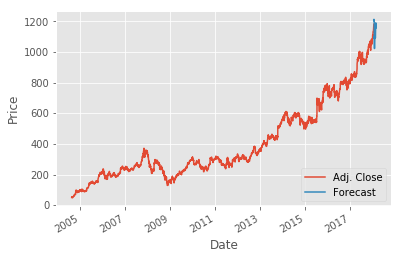

In [160]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

style.use('ggplot')

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

 X_lately variable contains the most recent features, which we're going to predict against.

In [161]:
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

In [162]:
print(forecast_set, confidence, forecast_out)

[1212.94964959 1212.49023036 1203.21488957 1208.1064431  1206.80685018
 1142.36000192 1087.68530501 1103.87101954 1077.13526996 1023.30539978
 1062.08039694 1077.46985503 1077.98627508 1095.57521479 1114.48280156
 1119.65736007 1127.02875584 1137.01557207 1134.08605127 1152.61734196
 1168.96776028 1140.90618037 1127.27942679 1092.11254696 1105.96490539
 1117.8491671  1125.92237777 1138.71896759 1154.47271141 1185.11291024
 1190.98028489 1162.13453757 1173.83838612 1174.79369726 1158.15618036] 0.9812876798674001 35


We import datetime to work with datetime objects, matplotlib's pyplot package for graphing, and style to make our graphs look decent.

In [163]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [164]:
style.use('ggplot')

Now we have the next day we wish to use, and one_day is 86,400 seconds.

In [165]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [166]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

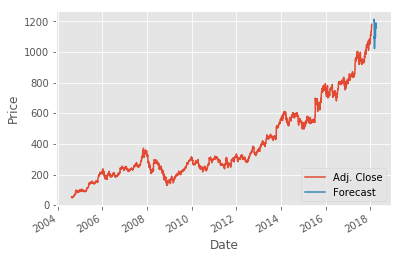

In [167]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

6 Pickling and Scaling
 In the real world, however, data is likely to be larger, and take much longer for processing. Since no one really talked about this important stage.While our machine learning classifier takes a few seconds to train, there may be cases where it takes hours or even days to train a classifier. Imagine needing to do that every day you wanted to forecast prices, or whatever. This is not necessary, as we can just save the classifier using the Pickle module.
With pickle, you can save any Python object, like our classifier. After defining, training, and testing your classifier, add:
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)
Now, run the script again you should have linearregression.pickle which is the serialized data for the classifier. Now, all you need to do to use the classifier is load in the pickle, save it to clf, and use just like normal. For example:
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

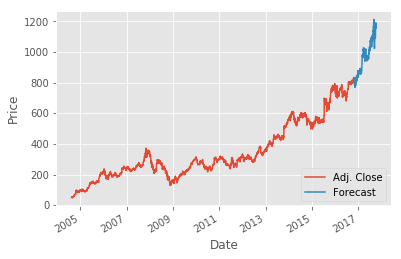

In [168]:
import pickle
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import pickle

style.use('ggplot')

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.1 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)

pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

7 Regression - Theory and how it works
The objective of linear algebra is to calculate relationships of points in vector space. This is used for a variety of things, but one day, someone got the wild idea to do this with features of a dataset. We can too! Remember before when we defined the type of data that linear regression was going to work on was called "continuous" data? This is not so much due to what people just so happen to use linear regression for, it is due to the math that makes it up. Simple linear regression is used to find the best fit line of a dataset. If the data isn't continuous, there really isn't going to be a best fit line. 

8 Regression - How to program the Best Fit Slope
Importing mean from statistics so we can easily get the mean of a list or array. 

In [169]:
from statistics import mean
import numpy as np

In [170]:
xs = [1,2,3,4,5]
ys = [5,4,6,5,6]

In [171]:
xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

In [172]:
def best_fit_slope(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs**2)))
    return m

In [173]:
m = best_fit_slope(xs,ys)
print(m)

0.29999999999999893


9 Regression - How to program the Best Fit Line


In [174]:
b = mean(ys) - m*mean(xs)

In [175]:
print(m,b)

0.29999999999999893 4.300000000000003


y=mx+b

In [176]:
regression_line = [(m*x)+b for x in xs]

In [177]:
regression_line = []
for x in xs:
    regression_line.append((m*x)+b)

In [178]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

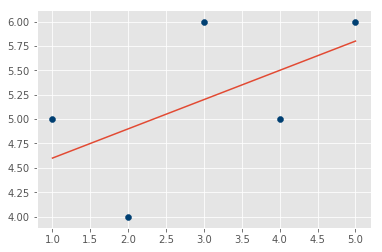

In [179]:
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()

Predict at x = 7

In [180]:
predict_x = 7

In [181]:
predict_y = (m*predict_x)+b
print(predict_y)

6.399999999999996


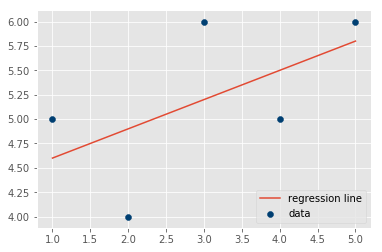

In [182]:
predict_x = 7
predict_y = (m*predict_x)+b

plt.scatter(xs,ys,color='#003F72',label='data')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

10 Regression - R Squared and Coefficient of Determination Theory
The distance between the regression line's y values, and the data's y values is the error, then we square that. The line's squared error is either a mean or a sum of this, we'll simply sum it.
Our best-fit line equation is the result of a proof that is used to discover the calculation for the best-fit regression line, where the regression line is the line that has the least squared error. 

11 Regression - How to Program R Squared


In [183]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [184]:
regression_line = [(m*x)+b for x in xs]

r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)


0.3214285714285714


That's a pretty low value, so actually our best-fit line isn't all that great according to this measure. Is r squared a good measure in this case? It may depend on what your goals are. In most cases, if you care about predicting exact future values, r squared is indeed very useful. If you're interested in predicting motion/direction, then our best fit line is actually pretty good so far, and r squared shouldn't carry as much weight. Look at our actual dataset though. We stuck with low, whole numbers. Variance from value to value was 20-50% at some points, that's a very high variance. It should not be all that surprising that, with this simple dataset, our best fit line still wasn't that descriptive of the actual data.

12 Creating Sample Data for Testing
 The systematic testing of programs is generally called "unit testing." This is where, as a large program is built, each tiny sub-system is constantly checked.
 Our assumption is that we created a best fit line, which we then tested with a coefficient of determination method. We know (mathematically) that the r squared value will be lower when the best-fit line is worse, and higher (closer to 1), when the best fit line is better. Our assumption is that we've built a system that works this way. Our system has many parts, and even a simple order of operations error would throw everything out of the window.
 To start, we'll build a skeleton function that mimics what the end-goal is

In [185]:
import random
def create_dataset(hm,variance,step=2,correlation=False):
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

hm - The value will be "how much." This is how many datapoints that we want in the set. We could choose to have 10, or 10 million, for example.
variance - This will dictate how much each point can vary from the previous point. The more variance, the less-tight the data will be.
step - This will be how far to step on average per point, defaulting to 2.
correlation - This will be either False, pos, or neg to indicate that we want no correlation, positive correlation, or negative correlation.

In [186]:
def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

In [187]:
xs, ys = create_dataset(40,40,2,correlation='pos')

1331.8707317073172
23069.899999999998
0.9422680318637134


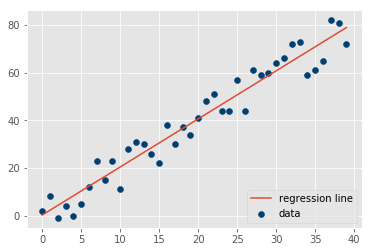

In [191]:
from statistics import mean
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)

    return m, b


def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]

    squared_error_regr = sum((ys_line - ys_orig) * (ys_line - ys_orig))
    squared_error_y_mean = sum((y_mean_line - ys_orig) * (y_mean_line - ys_orig))

    print(squared_error_regr)
    print(squared_error_y_mean)

    r_squared = 1 - (squared_error_regr/squared_error_y_mean)

    return r_squared


#xs, ys = create_dataset(40,40,2,correlation='pos')
xs, ys = create_dataset(40,10,2,correlation='pos')
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

13 Classification Intro with K Nearest Neighbors
K Nearest Neighbors and the Support Vector Machine (SVM).
when the dots were closer to one group than the other, you made the judgement most likely based purely on proximity. Thus, a machine learning algorithm is born: K Nearest Neighbors.K is a number you can choose, and then neighbors are the data points from known data. We're looking for any number of the "nearest" neighbors. Let's say K = 3, so then we're looking for the two closest neighboring points. 

14 Applying K Nearest Neighbors to Data


In [189]:
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace=True)
#df.drop(['id'], 1, inplace=True)


In [190]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

ValueError: labels ['class'] not contained in axis

In [ ]:
example_measures = np.array([4,2,1,1,1,2,3,2,1])
example_measures = example_measures.reshape(1, -1)
prediction = clf.predict(example_measures)
print(prediction)

In [ ]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

15 Euclidean Distance theory
 K Nearest Neighbors boils down to proximity, not by group, but by individual points. Thus, all this algorithm is actually doing is computing distance between points, and then picking the most popular class of the top K classes of points nearest to it. There are various ways to compute distance on a plane, many of which you can use here, but the most accepted version is Euclidean Distance.
 Basically, it's just the square root of the sum of the distance of the points from eachother, squared.

In [ ]:
plot1 = [1,3]
plot2 = [2,5]
euclidean_distance = sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2 )

16 Creating a K Nearest Neighbors Classifer from scratch


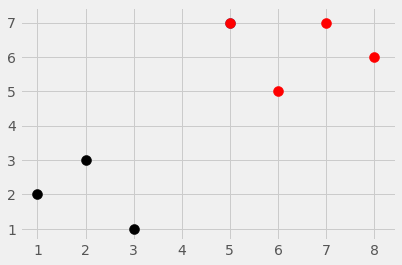

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
# same as:
##for i in dataset:
##    for ii in dataset[i]:
##        plt.scatter(ii[0],ii[1],s=100,color=i)
        
plt.scatter(new_features[0], new_features[1], s=100)

result = k_nearest_neighbors(dataset, new_features)
plt.scatter(new_features[0], new_features[1], s=100, color = result)  
plt.show()

18 Testing our K Nearest Neighbors classifier

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from collections import Counter
#dont forget this
import pandas as pd
import random
style.use('fivethirtyeight')

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

random.shuffle(full_data)

test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy:', correct/total)

ValueError: labels ['id'] not contained in axis

19 Final thoughts on K Nearest Neighbors
we can probably calculate at least 100-200 of these at the same time even on a cheap processor. If you want to learn how to thread, check out this threading tutorial. With Scikit-Learn, the KNN classifier comes with a parallel processing parameter called n_jobs. 

In [ ]:
import numpy as np
from math import sqrt
import warnings
from collections import Counter
import pandas as pd
import random

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
  
    return vote_result, confidence


df = pd.read_csv("breast-cancer-wisconsin.data.txt")
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)

test_size = 0.4
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote,confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy:', correct/total)

20 Support Vector Machine introduction
The objective of the Support Vector Machine is to find the best splitting boundary between data. In two dimensional space, you can think of this like the best fit line that divides your dataset. With a Support Vector Machine, we're dealing in vector space, thus the separating line is actually a separating hyperplane. The best separating hyperplane is defined as the hyperplane that contains the "widest" margin between support vectors. The hyperplane may also be referred to as a decision boundary. 
We will start with the above data. We noted in the past that the most common intuition is that you would classify a new data point based on what it is closest to or the proximity, which is what the K Nearest Neighbors algorithm does for us. The main issue with this objective is that, per datapoint, you have to compare it to every single datapoint to get the distances, thus the algorithm just doesn't scale well, despite being fairly reliable accuracy-wise. What the Support Vector Machine aims to do is, one time, generate the "best fit" line (but actually a plane, and even more specifically a hyperplane!) that best divides the data. Once this hyperplane is discovered, we refer to it as a decision boundary. We do this, because, this is the boundary between being one class or another. Once we calculate this decision boundary, we never need to do it again, unless of course we are re-training the dataset. Thus, this algorithm is going to scale, unlike the KNN classifier.



In [ ]:
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors, svm
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf = svm.SVC()

clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

21 Vector Basics
 a vector has both a magnitude and a direction
 

22 Support Vector Assertions
 The idea is to take known data, and then the SVM's fitment/training is actually an optimization problem that seeks to find the "best separating" line for the data, known as the decision boundary.
 The best separating hyperplane is the one with the most width between the data it is separating. 
 the classification function was just sign(x.w + b) (the period signals the dot product). What if x.w+b is 0? This means we're right on the decision boundary. Otherwise, if it is above 0, then we have a positive class. If below zero, it's a negative class. We're going to take advantage of this, and then go a step further and suggest that if x.w+b is 1, then this is a positive support vector. If x.w+b is -1, then this is a negative support vector. Later, an unknown might be -.52. It's still a negative class, even though it's not beyond the -1 that is the support vector mark. We're simply using support vectors to help us pick the best separating hyperplane, that is their only use.

23 Support Vector Machine Fundamentals
the calculation of our support vectors as being: Yi(Xi.w+b)-1 = 0

24 Constraint Optimization with Support Vector Machine
The objective of this convex problem is to find the minimum magnitude of vector w. One way to solve convex problems is by "stepping down" until you cannot get any further down. You will start with a large step, quickly getting down. Once you find the bottom, you are going to slowly go back the other way, repeating this until you find the absolute bottom. 

25 Beginning SVM from Scratch in Python


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        pass

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)

        return classification
        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

26 Support Vector Machine Optimization in Python
 As we step down our w vector, we'll test that vector in our constraint function, finding the largest b, if any, that will satisfy the equation, and then we'll store all of that data in our optimization dictionary. The dictionary will be { ||w|| : [w,b] }. When we're all done optimizing, we'll choose the values of w and b for whichever one in the dictionary has the lowest key value (which is ||w||).
Finally, we set our transforms. We've explained that our intention there is to make sure we check every version of the vector possible.
Next, we need some starting point that matches our data. To do this, we're going to first reference our training data to pick some haflway decent starting values
All we're doing here is cycling through all of our data, and finding the highest and lowest values. Now we're going to work on our step sizes
Next, we're going to set some variables that will help us make steps with b (used to make larger steps than we use for w, since we care far more about w precision than b), and keep track of the latest optimal value

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]
        
        # extremely expensive
        b_range_multiple = 5
        # 
        b_multiple = 5
        latest_optimum = self.max_feature_value*10

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                pass
            
    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)

        return classification
        


data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

27 Support Vector Machine Optimization in Python part 2
Here, we begin also iterating through possible b values, and now you can see our b values we set earlier in action. I will note here that we're straight iterating through b with a constant step-size. We could also break down b steps just like we did with w. To make things more accurate and precise, you probably would want to implement that.
Now we iterate through each of the transformations, testing each of them against our constraint requirements. If any of the featuresets within our data don't meet our constraints, then we toss the variables as they don't fit and we move on. I commented in a suggestion for a break here. If just one variable doesn't work you might as well give up on the rest since just 1 that doesn't fit is enough to toss the values for w and b. You could break there, as well as in the preceeding for loop.
Once we've passed zero with our stepping of the w vector, there's no reason to continue since we've tested the negatives via the transformation, thus we'll be done with that step size and either continue to the next, or be done entirely. If we've not passed 0, then we take another step. Once we've taken all of the steps that we want to take, then we're going to sort a list of all dictionary keys from our opt_dict (which contains ||w|| : [w,b]). We want the smallest magnitude of vector w, so we go with the first item in that list. We set self.w and self.b from here, we set latest optimums, and we either may take another step or be totally done with the entire process (if we have no more steps to take).

In [194]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]

        
        
        # extremely expensive
        b_range_multiple = 5
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        return classification
        
        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

28 Visualization and Predicting with our Custom SVM

Optimized a step.
Optimized a step.
Optimized a step.
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506


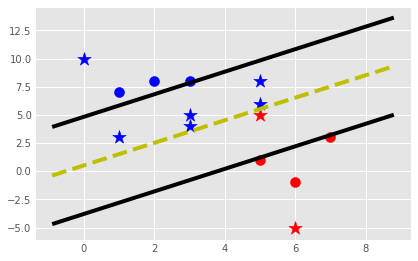

In [195]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]

        
        
        # extremely expensive
        b_range_multiple = 2
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification

    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()
        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)

svm.visualize()

29 Kernels Introduction
What if I told you that you could do calculations in plausibly infinite dimensions, or, better yet, you could have those calculations done for you in those dimensions, without you needing to work within those dimensions and still get the result back?
It turns out, that we actually can do this with what are known as Kernels.
Kernels are similarity functions, which take two inputs and return a similarity using inner products.
What kernels are going to allow us to do, possibly, is work in many dimensions, without actually paying the processing costs to do it. Kernels do have a requirement: They rely on inner products. For the purposes of this tutorial, "dot product" and "inner product" are entirely interchangeable.

30 Why Kernels
we can utilize a Kernel to help us translate our data to a plausibly infinite number of dimensions in order to find one that has linear separability.


31 Soft Margin Support Vector Machine
 there are two major reasons why the soft-margin classifier might be superior. One reason is your data is not perfectly linearly separable, but is very close and it makes more sense to continue using the default linearly kernel. The other reason is, even if you are using a kernel, you may wind up with significant over-fitment if you want to use a hard-margin. 

32 Kernels, Soft Margin SVM, and Quadratic Programming with Python and CVXOPT

In [ ]:
import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
             
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

if __name__ == "__main__":
    import pylab as pl

    def gen_lin_separable_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[0.8, 0.6], [0.6, 0.8]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_non_lin_separable_data():
        mean1 = [-1, 2]
        mean2 = [1, -1]
        mean3 = [4, -4]
        mean4 = [-4, 4]
        cov = [[1.0,0.8], [0.8, 1.0]]
        X1 = np.random.multivariate_normal(mean1, cov, 50)
        X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 50)
        X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_lin_separable_overlap_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[1.5, 1.0], [1.0, 1.5]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def split_train(X1, y1, X2, y2):
        X1_train = X1[:90]
        y1_train = y1[:90]
        X2_train = X2[:90]
        y2_train = y2[:90]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train

    def split_test(X1, y1, X2, y2):
        X1_test = X1[90:]
        y1_test = y1[90:]
        X2_test = X2[90:]
        y2_test = y2[90:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test

    def plot_margin(X1_train, X2_train, clf):
        def f(x, w, b, c=0):
            # given x, return y such that [x,y] in on the line
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]

        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        # w.x + b = 0
        a0 = -4; a1 = f(a0, clf.w, clf.b)
        b0 = 4; b1 = f(b0, clf.w, clf.b)
        pl.plot([a0,b0], [a1,b1], "k")

        # w.x + b = 1
        a0 = -4; a1 = f(a0, clf.w, clf.b, 1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, 1)
        pl.plot([a0,b0], [a1,b1], "k--")

        # w.x + b = -1
        a0 = -4; a1 = f(a0, clf.w, clf.b, -1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, -1)
        pl.plot([a0,b0], [a1,b1], "k--")

        pl.axis("tight")
        pl.show()

    def plot_contour(X1_train, X2_train, clf):
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        X1, X2 = np.meshgrid(np.linspace(-6,6,50), np.linspace(-6,6,50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = clf.project(X).reshape(X1.shape)
        pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

        pl.axis("tight")
        pl.show()

    def test_linear():
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM()
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_margin(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_non_linear():
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(polynomial_kernel)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_soft():
        X1, y1, X2, y2 = gen_lin_separable_overlap_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(C=1000.1)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

        
    #test_linear()
    #test_non_linear()
    test_soft()

33 Support Vector Machine Parameters
One-vs-One (or OVO). In this case, consider you have three total groups. The way this works is you have a specific boundary that separates 1 from 3 and 1 from 2, and this process repeats for the rest of the classes
The first parameter is C. This tells you right away that this is a soft-margin classifier. You can adjust C however you like, and you could make C high enough to create a hard-margin classifier. Recall C is used in the soft-margin optimization function for ||w||.
The default value for C is just a simple 1, and that really should be fine in most cases.

Next we have a choice of kernel. The default here is the rbf kernel, but you can also just have a linear kernel, a poly (for polynomial), sigmoid, or even a custom one of your choosing or design.

Next, you have the degree value, defaulting to 3, which is just the degree of the polynomial, if you are using the poly value for the kernel.

gamma is where you can set the gamma value for the rbf kernel. You should leave this as auto.

coef0 allows you to adjust the independent term in your kernel function, but you should also leave this alone most likely, and it is only used in the polynomial and sigmoid kernels.

The probability parameter setting may prove useful to you. Recall how an algorithm like K Nearest Neighbors not only has a model accuracy, but also each prediction can have a degree of "confidence." The SVM doesn't inherently have an attribute like this, but you can use this probability parameter to enable a form of one. This is a costly functionality, but may be important enough to you to enable it, otherwise the default is False.

Next, we have the shrinking boolean, which is defaulted to True. This has to do with whether or not you want a shrinking heuristic used in your optimization of the SVM, which is used in Sequential Minimal Optimization (SMO). You should leave this True, as it should greatly improve your performance, for very little loss in terms of accuracy in most cases.

The tol parameter is a setting for the SVM's tolerance in optimization. Recall that yi(xi.w+b)-1 >= 0. For an SVM to be valid, all values must be greater than or equal to 0, and at least one value on each side needs to be "equal" to 0, which will be your support vectors. Since it is highly unlikely that you will actually get values equal perfectly to 0, you set tolerance to allow a bit of wiggle room. The default tol with Scikit-Learn's SVM is 1e-3, which is 0.001.

The next important parameter is max_iter, which is where you can set a maximum number of iterations for the quadratic programming problem to cycle through to optimize. The default is -1, which means there is no limit.

The decision_function_shape is one-vs-one (ovo) or one-vs-rest (ovr), which is the concept discussed at the beginning of this tutorial.

random_state is used for a seed in the probability estimation, if you wanted to specify it.

Aside from the parameters, we also have a few attributes:

support_ gives you the index values for the support vectors. support_vectors_ are the actual support vectors. n_support_ will tell you how many support vectors you have, which is useful for comparing to your dataset size to determine if you may have some statistical issues. The last 3 parameters dual_coef_, coef_, and intercept_ will be useful if you plan to graph the SVM, for example.

34 Machine Learning - Clustering Introduction
clustering, which comes in two major forms: Flat and Hierarchical.
With Flat clustering, the scientist tells the machine how many classes/clusters to find. With Hierarchical clustering, the machine figures out the groups and how many.
The objective of clustering is to find relationships and meaning in data.
The idea here is you might use clustering to define classes, and then use a supervised machine learning algorithm to do further classification. Another use is for feature selection and validation. For example, consider our Breast Cancer dataset that we've been using. We might believe the features we've chosen are indeed descriptive and meaningful. One option we have is to feed this data through a K Means algorithm, and then indeed see whether or not the two groups we thought we were tracking were actually described by the data in a way we expected.
Our first algorithm to cover is the K-Means algorithm. The idea of K-Means is to attempt to cluster a given dataset into K clusters. The way it works is actually pretty impressive, and, luckily for us, quite simple. The process goes as follows:

Take entire dataset, and set, randomly, K number of centroids. Centroids are just the "centers" of your clusters. To start, I typically just take the first K values in my dataset and have those as the start, but you could also randomly select them if you wanted. It should not matter, but, if you are not optimizing for some reason, it may make sense to try to shuffle the data and try again.
Calculate distance of each featureset to the centroids, and classify each featureset as the centroid class closest to it. Centroid classes are arbitrary, you will likely just call the first centroid 0, the second centroid 1...and so on.
Once you have classified all data, now you take the "mean" of the groups, and set the new centroids as the mean of their associated groups.
Repeat #2 and #3 until you are optimized. Typically, you measure optimization by movement of the centroid. There are many ways to do this, we're just going to use percent change.

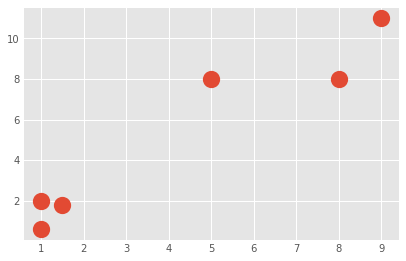

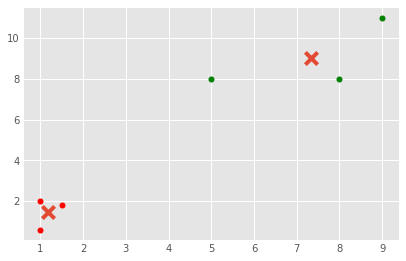

In [196]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
style.use('ggplot')

#ORIGINAL:

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])


plt.scatter(X[:, 0],X[:, 1], s=150, linewidths = 5, zorder = 10)
plt.show()
clf = KMeans(n_clusters=2)
clf.fit(X)
centroids = clf.cluster_centers_
labels = clf.labels_
colors = ["g.","r.","c.","y."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.show()


35 Handling Non-Numerical Data for Machine Learning


In [198]:
#https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing, cross_validation
import pandas as pd

'''
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination
'''

df = pd.read_excel('titanic.xls')
#print(df.head())
df.drop(['body','name'], 1, inplace=True)
df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)
#print(df.head())

def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)
print(df.head())

ImportError: Install xlrd >= 0.9.0 for Excel support

36 K-Means with Titanic Dataset


In [ ]:
#https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd

'''
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination
'''

df = pd.read_excel('titanic.xls')
#print(df.head())
df.drop(['body','name'], 1, inplace=True)
df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)
#print(df.head())

def handle_non_numerical_data(df):
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)


df.drop(['sex','boat'], 1, inplace=True)
X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

37 K-Means from Scratch in Python
the methodology for the K Means algorithm:

Choose value for K
Randomly select K featuresets to start as your centroids
Calculate distance of all other featuresets to centroids
Classify other featuresets as same as closest centroid
Take mean of each class (mean of all featuresets by class), making that mean the new centroid
Repeat steps 3-5 until optimized (centroids no longer moving)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = 10*["g","r","c","b","k"]


class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

38 Finishing K-Means from Scratch in Python


In [199]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn import preprocessing, cross_validation
import pandas as pd

##X = np.array([[1, 2],
##              [1.5, 1.8],
##              [5, 8],
##              [8, 8],
##              [1, 0.6],
##              [9, 11]])
##
##
##colors = ['r','g','b','c','k','o','y']



class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in X:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


# https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls
df = pd.read_excel('titanic.xls')
df.drop(['body','name'], 1, inplace=True)
#df.convert_objects(convert_numeric=True)
print(df.head())
df.fillna(0,inplace=True)

def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))

    return df

df = handle_non_numerical_data(df)
print(df.head())

# add/remove features just to see impact they have.
df.drop(['ticket','home.dest'], 1, inplace=True)


X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5)

clf = K_Means()
clf.fit(X)

correct = 0
for i in range(len(X)):

    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction == y[i]:
        correct += 1


print(correct/len(X))

ImportError: Install xlrd >= 0.9.0 for Excel support

39 Hierarchical Clustering with Mean Shift Introduction
We continue the topic of clustering and unsupervised machine learning with the introduction of the Mean Shift algorithm.

Mean Shift is very similar to the K-Means algorithm, except for one very important factor: you do not need to specify the number of groups prior to training. The Mean Shift algorithm finds clusters on its own. For this reason, it is even more of an "unsupervised" machine learning algorithm than K-Means.

The way Mean Shift works is to go through each featureset (a datapoint on a graph), and proceed to do a hill climb operation. Hill Climbing is just as it sounds: The idea is to continually increase, or go up, until you cannot anymore. We don't have for sure just one local maximal value. We might have only one, or we might have ten. Our "hill" in this case will be the number of featuresets/datapoints within a given radius. The radius is also called a bandwidth, and the entire window is your Kernel. The more data within the window, the better. Once we can no longer take another step without decreasing the number of featuresets/datapoints within the radius, we take the mean of all data in that region and we have located a cluster center. We do this starting from each data point. Many data points will lead to the same cluster center, which should be expected, but it is also possible that other data points will take you to a completely separate cluster center.

Immediately, however, you should begin to recognize the major downside for this operation: Scale. Scale sure seems to be a consistent problem. So we're running this optimization algorithm starting from every...single...datapoint. That's rough. There are some methods we can use to speed this up, but, regardless, this algorithm can still be quite costly.

While this method is a hierarchical clustering method, your kernel can be flat or something like a Gaussian kernel. Recall the kernel is your "window." When finding the mean, we can either have every featureset with the same weight (flat kernel), or assign weights by proximity to the kernel's center (Gaussian Kernel).

What is Mean Shift used for? Along with the clustering uses mentioned before, Mean Shift is also very popular in image analysis for both tracking and smoothing. For now, we're going to focus purely on the featureset clustering aspects.


[[ 2.80532709  3.11999028  3.62547686]
 [ 3.69119791  9.96180029 10.14815011]]
Number of estimated clusters: 2


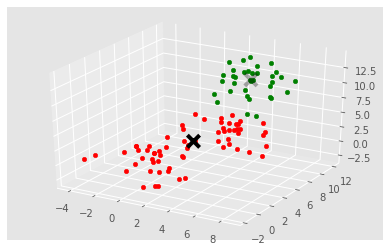

In [200]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1.5)

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()


40 Mean Shift applied to Titanic Dataset
 What we're interested to know is whether or not Mean Shift will automatically separate passengers into groups or not. If so, it will be interesting to inspect the groups that are created. The first obvious curiosity will be the survival rates of the groups found, but, then, we will also poke into the attributes of these groups to see if we can understand why the Mean Shift algorithm decided on the specific groups.

41 Mean Shift algorithm from scratch in Python


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

##plt.scatter(X[:,0], X[:,1], s=150)
##plt.show()

colors = 10*["g","r","c","b","k"]

class Mean_Shift:
    def __init__(self, radius=4):
        self.radius = radius

    def fit(self, data):
        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]
        
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                
            if optimized:
                break

        self.centroids = centroids



clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()

42 Dynamically Weighted Bandwidth for Mean Shift
The code works, but we decided that the hard-coded radius is weak. We want something better! First, I will begin by modifying our __init___ method
 The plan here is to create a massive radius, but make that radius go in steps, like bandwidths, or a bunch of radiuses with different lengths, which we'll call steps. If a featureset is in the closest radius, it will have a much higher "weight" than one much further away.

0.042880718735944845
{0: array([-9.68840144,  3.60028786]), 1: array([6.85706236, 8.81490068]), 2: array([ 9.84297399, -1.34175005])}


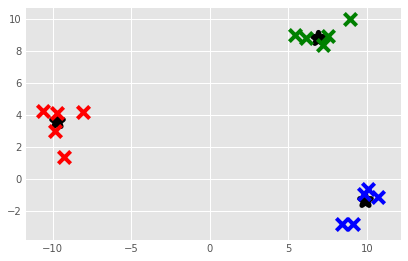

In [201]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

style.use('ggplot')

X, y = make_blobs(n_samples=15, centers=3, n_features=2)
##X = np.array([[1, 2],
##              [1.5, 1.8],
##              [5, 8],
##              [8, 8],
##              [1, 0.6],
##              [9, 11],
##              [8, 2],
##              [10, 2],
##              [9, 3]])


##plt.scatter(X[:, 0],X[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
##plt.show()

'''
1. Start at every datapoint as a cluster center

2. take mean of radius around cluster, setting that as new cluster center

3. Repeat #2 until convergence.

'''



class Mean_Shift:
    def __init__(self, radius = None, radius_norm_step = 100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
    
    def fit(self,data):

        if self.radius == None:
            all_data_centroid = np.average(data,axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm/self.radius_norm_step
            print(self.radius)

        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]

        weights = [i for i in range(self.radius_norm_step)][::-1]    
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                for featureset in data:

                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.00000000001
                    weight_index = int(distance/self.radius)
                    if weight_index > self.radius_norm_step-1:
                        weight_index = self.radius_norm_step-1

                    to_add = (weights[weight_index]**2)*[featureset]
                    in_bandwidth +=to_add

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

            to_pop = []

            for i in uniques:
                for ii in [i for i in uniques]:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii)) <= self.radius:
                        #print(np.array(i), np.array(ii))
                        to_pop.append(ii)
                        break

            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass

            prev_centroids = dict(centroids)
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False

            if optimized:
                break
            
        self.centroids = centroids
        self.classifications = {}

        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            #compare distance to either centroid
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            #print(distances)
            classification = (distances.index(min(distances)))

            # featureset that belongs to that cluster
            self.classifications[classification].append(featureset)


    def predict(self,data):
        #compare distance to either centroid
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = (distances.index(min(distances)))
        return classification



clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids
print(centroids)

colors = 10*['r','g','b','c','k','y']

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1], marker = "x", color=color, s=150, linewidths = 5, zorder = 10)

for c in centroids:
    plt.scatter(centroids[c][0],centroids[c][1], color='k', marker = "*", s=150, linewidths = 5)

plt.show()

43 Introduction to Neural Networks
 Deep Learning with Neural Networks and TensorFlow. The artificial neural network is a biologically-inspired methodology to conduct machine learning, intended to mimic your brain 
 The idea is to mimic a neuron, and, with a basic neuron, you have the dendrites, a nucleus, axon, and terminal axon.
 The circles are neurons or nodes, with their functions on the data and the lines connecting them are the weights/informating being passed along. Each column is a layer. The first layer of your data is the input layer. Then, unless your output is your input, you have at least one hidden layer. If you just have one hidden layer, then you have a regular artificial neural network. If you elect to have many hidden layers, boom, you have yourself a deep neural network. Wasn't that easy? ...Well at least in concept.

So with this model, you have input data, you weight it, and pass it through the function in the neuron. The function in the neuron is a threshold function, which is also called your activation function. Basically, is the sum of all of the values after the weighting above or below a certain value. If it is, then you fire a signal (1) out, or nothing is fired out (0). That is then weighted and passed along to the next neuron, and the same sort of function is run.

That's your neural network model. So what are the weights and thresholds? Well, to start, we get rid of the threshold "variable" thanks to Paul Werbos in 1974. Rather than dealing with the threshold as another variable to optimize, we take the threshold value, give it a weight of -1, and boom, the threshold is always at 0. No matter what the threshold is, it negatates itself, and always is a zero. We still have an ugly step function as the decision about whether or not the neuron fires a 0 or 1 can be messy. We decide to make that a sigmoid (s-shape) function of some kind instead.
As for the weights, they're just random to start, and they are unique per input into the node/neuron. Then, in a typical "feed forward" (your most basic type) neural network, you have your information pass straight through the network you created, and you compare the output to what you hoped the output would have been using your sample data. From here, you need to adjust the weights to help you get your output to match your desired output. The act of sending data straight through a neural network is called a feed forward neural network. Our data goes from input, to the layers, in order, then to output. When we go backwards and begin adjusting weights to minimize loss/cost, this is called back propagation.

This is a new optimization problem. Recall the Support Vector Machine optimization problem from a few tutorials ago, and how we explained that it was a nice convex optimization problem. Even though we had two variables, our optimization problem was a perfect bowl shape, so we both could know when we had reached optimization and also take huge steps along the way to make processing cheap. With the neural network, this isn't the case. In real practice, you're looking at something more like hundreds of thousands of variables, or millions, or more. The original solution here was to use stochastic gradient descent, but there are other options such as AdaGrad and the Adam Optimizer. Regardless, this is a massive computational task.

Now you can see why the Neural Network was mostly left on the shelf for over half a century. It was only very recently that we even had the power and architecture in our machines to even consider doing these operations, and the properly sized datasets to match. The good thing is though, we've had a half of a century to philosophize on the topic, and a lot of the work on the fundamentals has already been done, it just needs to be implemented and tested.

Interestingly enough, just as we don't fully understand the human brain, we don't really fully understand why or how neural networks actually achieve such interesting results. Through a lot of digging and analysis, we can demystify some things, but, due to many variables and dimensions, we actually don't really know much about what's going on, we just see good results and are happy. Even our first example will be extremely rudimentary in principle, yet will have staggeringly good results for what it is doing.

For simple classification tasks, the neural network is relatively close in performance to other simple algorithms, even something like K Nearest Neighbors. The real beauty in neural networks comes with much larger data, and much more complex questions, both of which put other machine learning models to shame. For example, current neural networks can do things like answer:

Jack is 12 years old. Jane is 10. Kate is older than Jane, and younger than Jack. How old is Kate?

The answer is 11, and a deep learning model can figure that out, without you somehow teaching it about how to actually do the logic part. You just simply pass the raw data in, which would be either words, or even characters, and the neural network does the rest. Oh, and you need millions of samples! By millions, I mean about half a billion for ideal accuracy.

Where do you get millions of samples of things? You have some options. One option with image data is ImageNet, which works much like wordnet in the organization of things. If you aren't familiar, you can poke around to get an idea. Everything there is free. Next, for text data, the very first stop should be something like the wikipedia data dumps. This is useful for more deep-learning tasks, not so much for labeled data. Next, for even more text data, why not go for a large portion of websites already crawled and parsed for you? If that sounds fun, check out CommonCrawl. This dataset is no joke, however, it's petabytes worth of data. For speech, I do not know many off the top of my head. One option is something like Tatoeba, which has both labeled and some translations even, which is pretty useful. When all else fails, you can try to create your own datasets, but the size requirements are fairly challenging. Also, you can always ask around. In my experience, there's a dataset for anything, you just have to find it. Many times, Google will fail you when trying to find the datasets, but people can help you. At the moment, you could try asking around in the Machine Learning subreddit, as probably 90% of what goes on there is neural network related, and everyone there needs to know about massive datasets.

It should be relatively obvious now why companies like Facebook and Google are so big into AI and neural networks especially. They actually possess the required volumes of data to do some very interesting things.

Now that we have that out of the way, how are we going to be working on neural networks? We're going to be using TensorFlow, which is a relatively new package from Google, still in beta at the time of my writing this. There are other packages used for machine learning like Theano or Torch, but they all work in similar ways. We really just need to pick one, and I choose Tensorflow.

45 Introduction to Deep Learning with TensorFlow
We have data (X), weights (w), and thresholds (t). Are all of these tensors? X will be the dataset (an array), so that's a tensor. The weights are also an array of weight values, so they're tensors too. Thresholds? Same as weights. Thus, our neural network is indeed a function of X,w, and t, or f(Xwt), so we are all set and can certainly use TensorFlow, but how?

TensorFlow works by first defining and describing our model in abstract, and then, when we are ready, we make it a reality in the session. The description of the model is what is known as your "Computation Graph" in TensorFlow terms. Let's play with a simple example.

In [202]:
import tensorflow as tf

# creates nodes in a graph
# "construction phase"
x1 = tf.constant(5)
x2 = tf.constant(6)

f:\win7\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [205]:
result = tf.multiply(x1,x2)
print(result)

Tensor("Mul:0", shape=(), dtype=int32)


In [206]:
# defines our session and launches graph
sess = tf.Session()
# runs result
print(sess.run(result))

30
